### Лабораторна робота №2, Штучний інтелект в задачах обробки зображень
**Виконав**: студент групи ІП-11, Лошак Віктор Іванович<br>
**Перевірив**: Нікітін В.А.<br>
**Група студентів що виконувала роботу**: Шамков Іван, Кисельов Микита, Лошак Віктор<vr>

**Тема роботи**: Виявлення об’єктів засобами OpenCV<br>
**Мета роботи**: Навчитись виявляти обличчя та пішоходів в режимі реального часу за допомогою OpenCV

07.04.2024

**Завдання**:<br>
1.	Використовуючи будь-яку фотографію з декількома людьми, виявити на ньому обличчя, очi, усмiшку. Порахувати кiлькiсть осiб на фото;
2.	Зробити розпізнавання використовуючи будь-яке відео з обличчям людини, тривалiстю не менше 30 секунд. Можно використати камеру ноутбука;
3.	Обробити вiдеофал, так щоб вiн видiляв пiшоходiв i, по можливостi, їхнi обличчя. Файл можна взяти з youtube i вирiзати ролик тривалiстю не менше 30 секунд.


**Task**:<br>
1. Using any photo with several people, detect a face, eyes, smile on it. Count the number of people in the photo;
2. Make recognition using any video with a human face, lasting at least 30 seconds. You can use a laptop camera;
3. Process the video footage so that it highlights pedestrians and, if possible, their faces. You can take the file from YouTube and cut a video with a duration of at least 30 seconds.

#### Task 1

In [1]:
from PIL import Image
import IPython.display as display
import cv2
import numpy as np

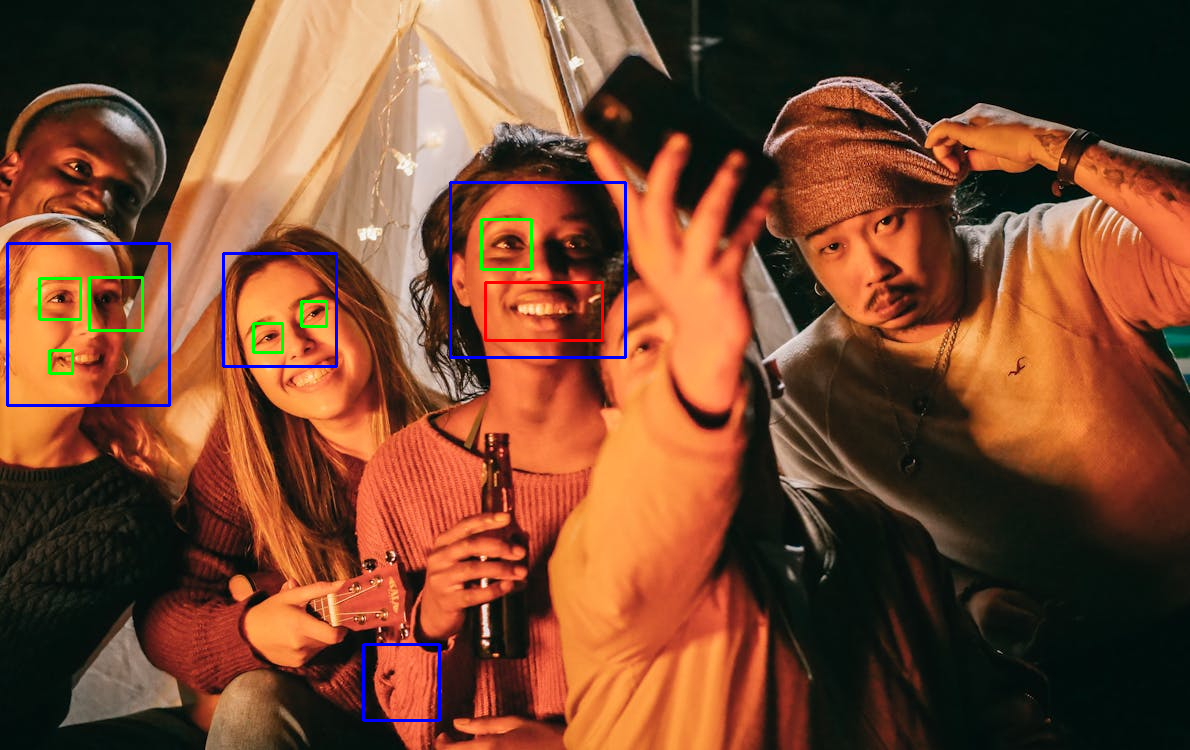

Number of faces detected:  4


In [52]:
img = cv2.imread('assets/pexels-photo-7149137.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

faces = face_cascade.detectMultiScale(gray, 1.1, 4)
number_of_faces = len(faces)

# Draw rectangles around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    
    smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display.display(Image.fromarray(img_rgb))
print("Number of faces detected: ", number_of_faces)

#### Task 2
In the next task we create a VideoWriter object and use VideoCapture to extract frames from the original video, detect faces there and write them into the newly created video at 30 fps. If we choose different fps then 30(the fps of the input video), the video will become longer then the input, which is not intended

In [38]:
input_video_path = 'assets/video1.mp4'
output_video_path = 'output/processed_video1.mp4'

In [ ]:
cap = cv2.VideoCapture(input_video_path)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object to write the video
out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), 30.0, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    out.write(frame)

cap.release()
out.release()


#### Task 3
For the pedestrian detection task, we'll use the HOG descriptor and SVM classifier that's pre-trained for pedestrian detection in OpenCV

In [48]:
input_video_path = 'assets/video3.mp4'
output_video_path = 'output/processed_video3.mp4'

In [50]:
cap = cv2.VideoCapture(input_video_path)

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), 30.0, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    boxes, weights = hog.detectMultiScale(frame, winStride=(8, 8), hitThreshold=0.65)

    for (x, y, w, h) in boxes:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    out.write(frame)

cap.release()
out.release()

#### Control questions:
1. Що таке алгоритм Віоли-Джонсона?
2. Що таке haarcascade?
3. Що таке HOG-класифікатор?
4. Що таке SVM-детектор?
5. Що робить метод cvtColor та яка його мета використання у цій лабораторній?<br>

**Answers:**<br>
1. Алгоритм Віоли-Джонса — це швидкий метод для виявлення облич в реальному часі, який використовує концепцію каскадних класифікаторів. Алгоритм використовує так звані "особливості Хаара", які є простими формами, подібними до прямокутників, що можуть визначати різні характеристики обличчя, наприклад, краї очей або лінії носа. Після тренування на великій кількості позитивних (зображення з обличчями) та негативних (зображення без облич) зразків, класифікатор може швидко і ефективно визначати наявність облич на нових зображеннях.

2. Haarcascade — це класифікатор, що базується на характеристиках Хаара, який використовується для виявлення об'єктів в зображенні. Він використовує машинне навчання для ідентифікації облич за допомогою порівняння з великою кількістю позитивних та негативних зразків. Haarcascade включає в себе каскади, де кожен наступний класифікатор тренується виходячи з помилок попереднього, створюючи таким чином ефективну модель для виявлення об'єктів.

3. HOG-класифікатор (Histogram of Oriented Gradients) — це техніка виявлення об'єктів, яка аналізує градієнти орієнтації зображення. Він працює шляхом поділу зображення на невеликі регіони, для яких обчислюються гістограми орієнтованих градієнтів. Ці гістограми потім використовуються як характеристики для класифікації та виявлення об'єктів, таких як пішоходи.

4. SVM-детектор (Support Vector Machine) — це алгоритм машинного навчання, який використовується для класифікації та виявлення об'єктів. У контексті комп'ютерного зору SVM може бути навчений розрізняти різні класи об'єктів на основі їх характеристик. Він працює шляхом визначення максимально широкої межі між класами даних, що дозволяє ефективно класифікувати нові зразки.

5. Метод `cvtColor` в OpenCV використовується для перетворення зображення з одного колірного простору в інший, наприклад, з BGR (стандартний для зображень в OpenCV)

